## Credit Card Defaulters Prediction using Logistic Regression

Youtube Explanation : https://youtu.be/xgwVFANYw_s

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Print multiple statment in a single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## Load Dataset
df_default = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Credit_Card_Defaulter/Credit_Card_defaulters.csv")

In [4]:
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
df_default.info()
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


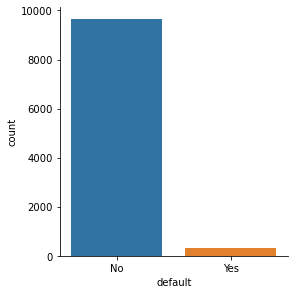

In [6]:
##lets visualise the categorical features
sns.catplot(x = "default",data= df_default,kind="count",height=4,aspect=1)

In [7]:
df_default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [8]:
#df_default["default"] = df_default["default"].apply({"No":0,"Yes":1}.get)
df_default["default"] = df_default["default"].replace(["No","Yes"],[0,1])
df_default["student"] = df_default["student"].map({"No":0,"Yes":1})

In [9]:
df_default.student.value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [10]:
df_default.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [11]:
df_default.head()
df_default.shape

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


(10000, 4)

### Check If the Linear Regression can solve the classification problem ?

In [12]:
# Lets bulid the Linear Regression model using default and balanace 
X = df_default[["balance"]]
y = df_default["default"]
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
linreg.coef_
linreg.intercept_

LinearRegression()

array([0.00012987])

-0.07519195884353799

In [13]:
y_pred = linreg.predict(X)

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
type(y_pred)

numpy.ndarray

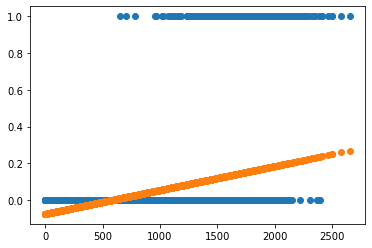

In [16]:
plt.scatter(X, y) 
plt.scatter(X.values,y_pred)
plt.show()

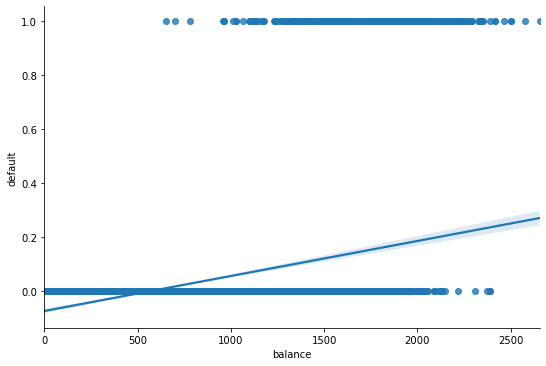

In [17]:
#try to check the simple Linear Regression on this data
sns.lmplot(x="balance",y = "default",data= df_default,height= 5, aspect=1.5, fit_reg= True)

If we use this Linear regression line to predict the output we will get 
 - Output becomes greater 1 and less than 0 and It violate the rule of probability.

### Apply Logistic Regression to verify the concept of sigmoid or Logit Function

 - We mostly use logictic regression for Binary classication problems and here we have only 2 classes of column "Default" D -> {0,1}
 - This transform linear function to a non-linear function(sigmoid or Logit) that predict categories with probabilities.
 - These predicted output always have probabilites between 0 and 1.


In [18]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e42) # Set Large C value for low regularization
logreg.fit(X, y)
y_pred = logreg.predict_proba(X) ## Predict probability estimates.

LogisticRegression(C=1e+42)

In [19]:
# provide probability of both classes (0,1)
y_pred.shape

(10000, 2)

In [20]:
np.round(y_pred[:,0],3) # Probability for Class 0

array([0.999, 0.998, 0.991, ..., 0.998, 0.883, 1.   ])

In [21]:
np.round(y_pred[:,1],3) # Probability for Class 1

array([0.001, 0.002, 0.009, ..., 0.002, 0.117, 0.   ])

In [22]:
(y_pred[:,0]) + (y_pred[:,1])

array([1., 1., 1., ..., 1., 1., 1.])

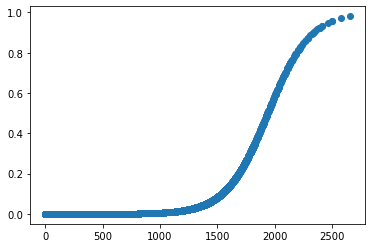

In [23]:
## Now see the sigmoid curve.
#plt.scatter(X.values,y_pred[:,0])   # Probability for Class 0
plt.scatter(X.values,y_pred[:,1])   # Probability for Class 1
plt.show()

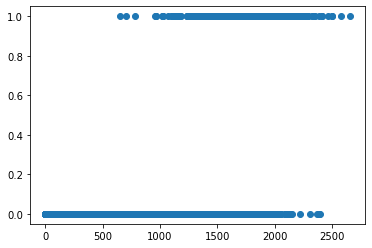

In [24]:
## Now plot the graph with training target data
plt.scatter(X.values,y)

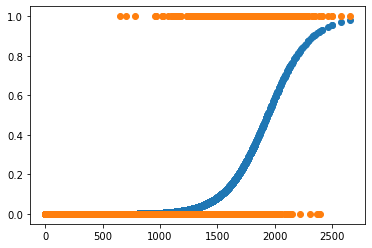

In [25]:
## Now combine predicted non-linear line(sigmoid curve) with trainning target data (y)
plt.scatter(X.values,y_pred[:,1])
plt.scatter(X.values,y)
plt.show()

we can see from the above graph that predicted sigmoid line lies between 0 and 1.

## Creating logistic Regression Model using all variables

In [26]:
## Import librairies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,average_precision_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
df_default.sample(n = 10, random_state= 42)

,default,student,balance,income
6252,0,0,1435.662933,31507.08928
4684,0,0,771.789347,42139.07027
1731,0,0,0.000000,21809.21851
4742,0,0,113.571264,32803.83265
4521,0,0,1358.132472,49903.59708
6340,0,0,1302.553499,32235.05245
576,1,0,1763.579088,46227.07454
5202,0,0,857.329142,25742.17377
6363,0,0,1366.725774,35425.51208
439,1,1,1118.701039,21848.44290


In [28]:
# create X and y 
X = df_default.drop("default", axis=1)

In [29]:
X.head()

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588


In [30]:
Y = df_default["default"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [31]:
## split X and Y
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [32]:
logreg = LogisticRegression(C=.1)
logreg.fit(X_train,Y_train)

LogisticRegression(C=0.1)

In [33]:
Y_pred = logreg.predict(X_test)
Y_pred
type(Y_pred)
Y_pred.size

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

numpy.ndarray

3000

In [34]:
logreg.coef_
logreg.intercept_

array([[-3.11003593e+00,  3.45660833e-03, -1.27575957e-04]])

array([-2.3871962])

In [35]:
coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coef

,0,0
0,student,-3.110036
1,balance,0.003457
2,income,-0.000128


In [36]:
## Measure performance metrics
log_accuracy = metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy Score : ", log_accuracy)
classification = metrics.classification_report(Y_test,Y_pred)
print(classification)

Accuracy Score :  0.968
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2906
           1       0.46      0.12      0.19        94

    accuracy                           0.97      3000
   macro avg       0.72      0.56      0.59      3000
weighted avg       0.96      0.97      0.96      3000



In [37]:
## Create a confusion metric to understand the classification
conf = metrics.confusion_matrix(Y_test,Y_pred)
conf

array([[2893,   13],
       [  83,   11]], dtype=int64)

In [38]:
from mlxtend.plotting import plot_confusion_matrix
##  http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

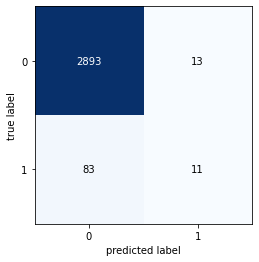

In [39]:
fig, ax = plot_confusion_matrix(conf_mat=conf)
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0, 0.5, 'True Positive Rate(Sensitivity)')

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

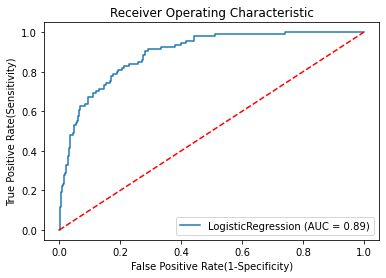

In [40]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(logreg,X_test,Y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

ROC_AUC is :  0.8925407447540672


Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate(Sensitivity)')

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

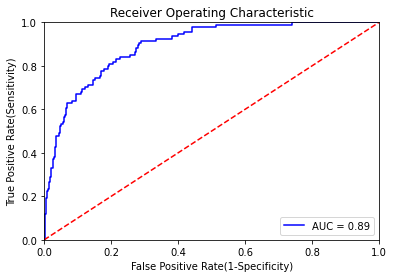

In [41]:
# Draw ROC-AUC curve and measure the AUC score
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC is : " , roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()


AUC can range from 50% to 100%. Higher the AUC value, better is the prediction power of model.

In [42]:
AUC = metrics.roc_auc_score(Y_test,preds)
AUC

0.8925407447540672

In [43]:
# Precision-Recall curve for a predictive model
from sklearn.metrics import precision_recall_curve,auc
from matplotlib import pyplot

In [44]:
Y_pred_prob = logreg.predict_proba(X_test)

In [45]:
# retrieve just the probabilities for the positive class
Y_Prob_Pred = Y_pred_prob[:, 1]

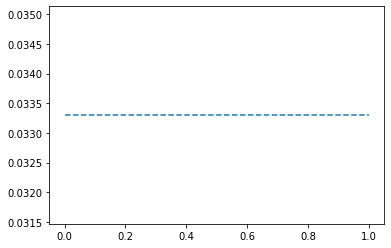

In [46]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(Y[Y==1]) / len(Y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

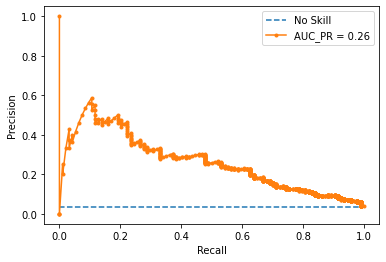

In [47]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(Y[Y==1]) / len(Y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_Prob_Pred)
# calculate precision-recall-AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [48]:
F1Score = metrics.f1_score(Y_test,Y_pred)
F1Score

0.1864406779661017

A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. For a balanced dataset this will be 0.5.


While the baseline is fixed with ROC, the baseline of [precision-recall curve] is determined by the ratio of positives (P) and negatives (N) as y = P / (P + N). For instance.

To explain why the ROC and PR curves tell a different story, PR curve focuses on the minority class, whereas the ROC curve covers both classes.

If we use a threshold of 0.5 and use the logistic regression model to make a prediction for all examples in the test set, we see that it predicts class 0 or the majority class in all cases. This can be confirmed by using the fit model to predict crisp class labels, that will use the default threshold of 0.5.

The distribution of predicted class labels can then be summarized.

In [49]:
# predict class labels
yhat = logreg.predict(X_test)
# summarize the distribution of class labels
from collections import Counter
print(Counter(yhat))

Counter({0: 2976, 1: 24})


We can then create a histogram of the predicted probabilities of the positive class to confirm that the mass of predicted probabilities is below 0.5, and therefore are mapped to class 0.

In [50]:
yhat = logreg.predict_proba(X_test)
pos_probs = yhat[:, 1]

(array([1.385e+03, 4.020e+02, 2.400e+02, 1.560e+02, 1.080e+02, 8.800e+01,
        7.100e+01, 5.900e+01, 4.000e+01, 3.600e+01, 3.800e+01, 1.900e+01,
        2.700e+01, 2.700e+01, 1.600e+01, 2.000e+01, 1.800e+01, 1.200e+01,
        8.000e+00, 1.800e+01, 1.400e+01, 1.300e+01, 1.000e+01, 1.400e+01,
        1.000e+01, 7.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 1.100e+01,
        3.000e+00, 8.000e+00, 5.000e+00, 4.000e+00, 8.000e+00, 2.000e+00,
        7.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

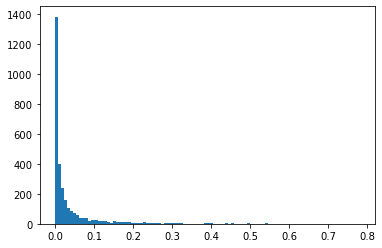

In [51]:
# create a histogram of the predicted probabilities
import matplotlib.pyplot as plt
plt.hist(pos_probs, bins=100)
plt.show()

showing the center of mass (most predicted probabilities) is less than 0.5 and in fact is generally close to zero.
This means, unless probability threshold is carefully chosen, any skillful nuance in the predictions made by the model will be lost. Selecting thresholds used to interpret predicted probabilities as crisp class labels is an important topic.

## When to Use **ROC vs. Precision-Recall Curves**?

    Generally, the use of ROC curves and precision-recall curves are as follows:

    ROC curves should be used when there are roughly equal numbers of observations for each class.
    Precision-Recall curves should be used when there is a moderate to large class imbalance.
